#Pandas = numpy + matplotlib
#reactangular data


# Pandas built on top of numpy & matplotlib

Tabular Data > df

In [1]:
#Import pandas
import pandas as pd

In [2]:
#Import OS & Pandas
import os
import pathlib
base_path = str(pathlib.Path().absolute())
input_path=base_path +'\\input\\'

#List down the files
for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

\input\avocados_2019_sorted.csv
\input\commercial_loan_data.csv
\input\loan_payments_data.csv
\input\.ipynb_checkpoints\avocados_2019_sorted-checkpoint.csv


In [3]:
#Loading Commercial loan data CSV file into pandas df & reading sample data
commercial_loan_data = pd.read_csv(input_path+"commercial_loan_data.csv")
commercial_loan_data.head(2)

#Loading loan payment data CSV file into pandas df & reading sample data
loan_payment_data = pd.read_csv(input_path+"loan_payments_data.csv")
loan_payment_data.head(2)

# converting dtypes using astype 
loan_payment_data["effective_date"]= pd.to_datetime(loan_payment_data["effective_date"],format='%m/%d/%Y') 
loan_payment_data["due_date"]= pd.to_datetime(loan_payment_data["due_date"],format='%m/%d/%Y')


In [4]:
#Summary Statistics - Aggregations

def pctn0(column):
    return column.quantile(0.10)

print(f'mean: {loan_payment_data["age"].mean()},median: {loan_payment_data["age"].median()},mode:{loan_payment_data["age"].mode()},stddev:{loan_payment_data["age"].std()},variance:{loan_payment_data["age"].var()},min:{loan_payment_data["age"].min()},max:{loan_payment_data["age"].max()},\
pctN0:{loan_payment_data["age"].agg(pctn0)}')
#Other functions cumsum(),cummin(),cummax(),cumprod()

#Summarizing Dates
print(f'minDate: {loan_payment_data["due_date"].min()}')


mean: 31.116,median: 30.0,mode:0    26
dtype: int64,stddev:6.084783741956056,variance:37.02459318637275,min:18,max:51,pctN0:24.0
minDate: 2016-09-15 00:00:00


# IQR - InterQuartileRange - defined as the difference between the largest and smallest values in the middle 50% of a set of data.

In [5]:
# Efficient Summaries - Using Pandas & Numpy

import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(loan_payment_data[["terms"]].agg([iqr, np.median,np.mean,np.max,np.min]))

         terms
iqr     15.000
median  30.000
mean    22.824
amax    30.000
amin     7.000


In [6]:
#Cumulative Stats

# Sort by date
loan_payment_data["due_month"] = loan_payment_data["due_date"].apply(lambda x:x.strftime('%Y%m'))
loan_payment_data = loan_payment_data.sort_values("due_month",ascending=True)

# Get the total amt given as loan
loan_payment_data['principal_sum'] = loan_payment_data['Principal'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
loan_payment_data['principal_max'] = loan_payment_data['Principal'].cummax()

# See the columns you calculated
# df2 = df.drop_duplicates(["date", "cid"])
# df2.groupby('date').cid.size()
lpd = loan_payment_data.drop_duplicates(subset=["due_month", "Principal","principal_sum", "principal_max"])
print(lpd.groupby(["due_month","principal_sum","principal_max"]).size())

due_month  principal_sum  principal_max
201609     1000           1000             1
           1800           1000             1
           2600           1000             1
           3600           1000             1
           4400           1000             1
                                          ..
201611     467600         1000             1
           468600         1000             1
           469600         1000             1
           470600         1000             1
           471600         1000             1
Length: 500, dtype: int64


In [7]:
#Drop duplicates:
lpd_edu_gen = loan_payment_data.drop_duplicates(subset=["education","Gender"])

#Counting Categorical Variables
lpd_edu_gen["education"].value_counts(sort=True,normalize=True)


Bechalor                0.285714
college                 0.285714
High School or Below    0.285714
Master or Above         0.142857
Name: education, dtype: float64

In [8]:
##ValueCounts:
loan_payment_data.head(2)

##AggregationOnSingleColumnUsingValuCounts

print(loan_payment_data.education.value_counts(normalize=True).sort_index(ascending=False).sort_values(ascending=False))

##AggregationOnMultipleColumns
loan_payment_data[['education', 'Gender']].apply(pd.Series.value_counts)

##UsingCrossTab
pd.crosstab(loan_payment_data.education,loan_payment_data.Gender)

##AggregateGroupBySize
loan_payment_data.groupby(["education", "Gender"]).size()



college                 0.440
High School or Below    0.418
Bechalor                0.134
Master or Above         0.008
Name: education, dtype: float64


education             Gender
Bechalor              female     13
                      male       54
High School or Below  female     31
                      male      178
Master or Above       male        4
college               female     33
                      male      187
dtype: int64

In [9]:
#Grouped Summary Statistics

lpd_all = loan_payment_data["Principal"].sum()

lpd_male = loan_payment_data[loan_payment_data["Gender"] == "male"]["Principal"].sum()
lpd_femme = loan_payment_data[loan_payment_data["Gender"] == "female"]["Principal"].sum()

lpd_propn_by_gender = [lpd_male, lpd_femme] / lpd_all
print(lpd_propn_by_gender) 


[0.84563189 0.15436811]


In [10]:
#Calculations with .groupby()
lpd_by_type = loan_payment_data.groupby("Gender")["Principal"].sum()
print(lpd_by_type)

# Group by multi cols
lpd_by_type_edu = loan_payment_data.groupby(["Gender","education"])["Principal"].sum()
print(lpd_by_type_edu)

Gender
female     72800
male      398800
Name: Principal, dtype: int64
Gender  education           
female  Bechalor                 12400
        High School or Below     29400
        college                  31000
male    Bechalor                 50900
        High School or Below    169400
        Master or Above           2400
        college                 176100
Name: Principal, dtype: int64


In [11]:
#Multiple grouped summaries
import numpy as np

lpd_stats = loan_payment_data.groupby(["Gender"])[["Principal"]].agg([np.min,np.max,np.mean,np.median])
#Get stats of amt disbursed by gender
print(lpd_stats)

# is there any difference in amt disbursed + terms btw gender??
lpd_stats_terms = loan_payment_data.groupby(["Gender"])[["Principal","terms"]].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_stats
print(lpd_stats_terms)

       Principal                         
            amin  amax        mean median
Gender                                   
female       500  1000  945.454545   1000
male         300  1000  942.789598   1000
       Principal                          terms                       
            amin  amax        mean median  amin amax       mean median
Gender                                                                
female       500  1000  945.454545   1000     7   30  22.662338     30
male         300  1000  942.789598   1000     7   30  22.853428     30


In [12]:
#Pivot Tables

loan_payment_pvt = loan_payment_data.pivot_table(index=['education','Gender'], aggfunc='size')

print(loan_payment_pvt)

lpd_pvt_fill = loan_payment_data.pivot_table(values='Principal',index=['education'],columns=['Gender'],
                                             aggfunc=([np.mean,np.median]),fill_value=0,margins=True)

print(lpd_pvt_fill)

education             Gender
Bechalor              female     13
                      male       54
High School or Below  female     31
                      male      178
Master or Above       male        4
college               female     33
                      male      187
dtype: int64
                            mean                         median            
Gender                    female        male         All female  male   All
education                                                                  
Bechalor              953.846154  942.592593  944.776119   1000  1000  1000
High School or Below  948.387097  951.685393  951.196172   1000  1000  1000
Master or Above         0.000000  600.000000  600.000000      0   550   550
college               939.393939  941.711230  941.363636   1000  1000  1000
All                   945.454545  942.789598  943.200000   1000  1000  1000


In [13]:
#Explicit Indexes
loan_payment_data_gen = loan_payment_data.set_index('Gender')
print(loan_payment_data_gen.head(2))
#print(loan_payment_data_gen.reset_index())
#print(loan_payment_data_gen.reset_index(drop=True))

            Loan_ID loan_status  Principal  terms effective_date   due_date  \
Gender                                                                        
female  xqd20160250     PAIDOFF       1000     15     2016-09-13 2016-09-27   
male    xqd20160175     PAIDOFF        800     15     2016-09-12 2016-09-26   

          paid_off_time  past_due_days  age             education due_month  \
Gender                                                                        
female   9/26/2016 6:17            NaN   35              Bechalor    201609   
male    9/22/2016 10:30            NaN   39  High School or Below    201609   

        principal_sum  principal_max  
Gender                                
female           1000           1000  
male             1800           1000  


In [14]:
# Subsetting with .loc[]
gendr = ['male','female','transgender']

# Subset
print(loan_payment_data[loan_payment_data["Gender"].isin(gendr)].head(2))
print('################################################################################')

# Subset indexed DF using .loc[]
print(loan_payment_data_gen.loc['male'].head(2))

         Loan_ID loan_status  Principal  terms effective_date   due_date  \
249  xqd20160250     PAIDOFF       1000     15     2016-09-13 2016-09-27   
174  xqd20160175     PAIDOFF        800     15     2016-09-12 2016-09-26   

       paid_off_time  past_due_days  age             education  Gender  \
249   9/26/2016 6:17            NaN   35              Bechalor  female   
174  9/22/2016 10:30            NaN   39  High School or Below    male   

    due_month  principal_sum  principal_max  
249    201609           1000           1000  
174    201609           1800           1000  
################################################################################
            Loan_ID loan_status  Principal  terms effective_date   due_date  \
Gender                                                                        
male    xqd20160175     PAIDOFF        800     15     2016-09-12 2016-09-26   
male    xqd20160176     PAIDOFF        800     15     2016-09-12 2016-09-26   

          pa

In [15]:
#Setting Multi Level Indexes - 

# Index 
lpd_ind = loan_payment_data.set_index(["Gender","loan_status"])

# List of tuples - rows to keep
rows_to_keep = [('male','PAIDOFF'),('female','PAIDOFF')]

#groupby(["Gender","loan_status"])
# Subset for rows to keep
lpd_ind.loc[rows_to_keep]
# Get count by gender who has paid off the loan
print(lpd_ind.query('loan_status == "PAIDOFF"').groupby(["Gender","loan_status","education"])["education"].agg(["count"]))

                                         count
Gender loan_status education                  
female PAIDOFF     Bechalor                 12
                   High School or Below     19
                   college                  22
male   PAIDOFF     Bechalor                 29
                   High School or Below    104
                   Master or Above           3
                   college                 111


In [16]:
#Sorting by Index Values

print('#######################  Sorting by Index Values - General ################################')
print(lpd_ind.sort_index(ascending=False).head(2))

print('#######################  Sorting by Single Index################################')
print(lpd_ind.sort_index(level=['loan_status'],ascending=True).head(2))

print('######################  Sorting by Multi Index #####################')
print(lpd_ind.sort_index(level=['Gender','loan_status'],ascending=[True,False]).head(2))

#######################  Sorting by Index Values - General ################################
                        Loan_ID  Principal  terms effective_date   due_date  \
Gender loan_status                                                            
male   PAIDOFF      xqd20160175        800     15     2016-09-12 2016-09-26   
       PAIDOFF      xqd20160176        800     15     2016-09-12 2016-09-26   

                      paid_off_time  past_due_days  age             education  \
Gender loan_status                                                              
male   PAIDOFF      9/22/2016 10:30            NaN   39  High School or Below   
       PAIDOFF      9/26/2016 13:00            NaN   25               college   

                   due_month  principal_sum  principal_max  
Gender loan_status                                          
male   PAIDOFF        201609           1800           1000  
       PAIDOFF        201609           2600           1000  
######################

In [17]:
#Slicing/Subsetting by .loc/.iloc
print("################ Using .loc for slicing ################")
print(lpd_ind.loc[['male', 'female'],["Principal","age"]].head(5))

print("################ Using .iloc for slicing ################")
print(lpd_ind.iloc[0:3,1:4])

################ Using .loc for slicing ################
                           Principal  age
Gender loan_status                       
male   PAIDOFF                   800   39
       PAIDOFF                   800   25
       COLLECTION_PAIDOFF       1000   28
       COLLECTION                800   39
       PAIDOFF                   300   29
################ Using .iloc for slicing ################
                    Principal  terms effective_date
Gender loan_status                                 
female PAIDOFF           1000     15     2016-09-13
male   PAIDOFF            800     15     2016-09-12
       PAIDOFF            800     15     2016-09-12


In [18]:
#Slicing TimeSeries

print('#####- Using Boolean to subset -#####')
lpd_bool = loan_payment_data[(loan_payment_data["due_date"] >= "2016-01-01") & (loan_payment_data["due_date"] <= "2016-12-31")]
print(lpd_bool.head(2))

print('#####- Set date as index & sort by it -#####')
lpd_ind = loan_payment_data.set_index("due_date").sort_index()

print('#####- Use .loc[] to subset -#####')
print(lpd_ind.loc["2015":"2016"].head(2))

print('#####- Use .loc[] to subset temperatures_ind for rows from Aug 2016 till Oct,2016 -#####')
print(lpd_ind.loc["2016-08":"2016-10"].head(2))

#####- Using Boolean to subset -#####
         Loan_ID loan_status  Principal  terms effective_date   due_date  \
249  xqd20160250     PAIDOFF       1000     15     2016-09-13 2016-09-27   
174  xqd20160175     PAIDOFF        800     15     2016-09-12 2016-09-26   

       paid_off_time  past_due_days  age             education  Gender  \
249   9/26/2016 6:17            NaN   35              Bechalor  female   
174  9/22/2016 10:30            NaN   39  High School or Below    male   

    due_month  principal_sum  principal_max  
249    201609           1000           1000  
174    201609           1800           1000  
#####- Set date as index & sort by it -#####
#####- Use .loc[] to subset -#####
                Loan_ID loan_status  Principal  terms effective_date  \
due_date                                                               
2016-09-15  xqd20160706     PAIDOFF        300      7     2016-09-09   
2016-09-16  xqd20160014     PAIDOFF        900      7     2016-09-10   

   

In [19]:
# Working with Pivot Tables

loan_payment_data['year'] = loan_payment_data['due_date'].dt.year
print(loan_payment_data.head(2))

lpd_age_edu = loan_payment_data.pivot_table(values='age',index=['Gender','loan_status'],columns=['education'])
print(lpd_age_edu.head(2))
print('#####- Calculations in pivot table -#####')

mean_age_by_edu = lpd_age_edu.mean()

print('#####- Find the edu that had the highest mean age -#####')

print(mean_age_by_edu[mean_age_by_edu == mean_age_by_edu.max()])

print('#####- Find the edu that had the lowest mean age -#####')

print(mean_age_by_edu[mean_age_by_edu == mean_age_by_edu.min()])

         Loan_ID loan_status  Principal  terms effective_date   due_date  \
249  xqd20160250     PAIDOFF       1000     15     2016-09-13 2016-09-27   
174  xqd20160175     PAIDOFF        800     15     2016-09-12 2016-09-26   

       paid_off_time  past_due_days  age             education  Gender  \
249   9/26/2016 6:17            NaN   35              Bechalor  female   
174  9/22/2016 10:30            NaN   39  High School or Below    male   

    due_month  principal_sum  principal_max  year  
249    201609           1000           1000  2016  
174    201609           1800           1000  2016  
education                  Bechalor  High School or Below  Master or Above  \
Gender loan_status                                                           
female COLLECTION               NaN             27.714286              NaN   
       COLLECTION_PAIDOFF      34.0             40.000000              NaN   

education                    college  
Gender loan_status                    
f

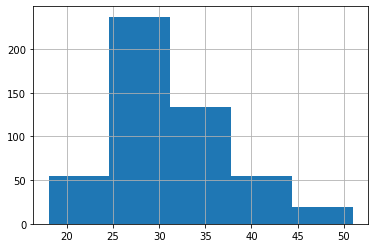

In [20]:
#####- Visualizing the data

#Histograms
import matplotlib.pyplot as plt
loan_payment_data["age"].hist(bins=5)
plt.show()

education
Bechalor                32.134328
High School or Below    31.377990
Master or Above         40.250000
college                 30.390909
Name: age, dtype: float64


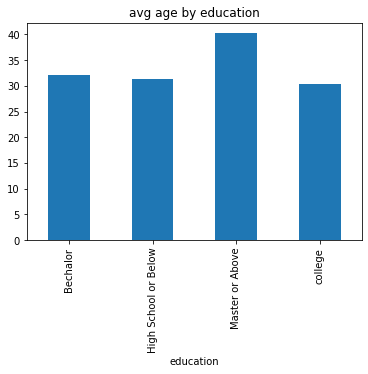

In [21]:
#BarPlot
avg_ageByEducation = loan_payment_data.groupby("education")["age"].mean()
print(avg_ageByEducation)
avg_ageByEducation.plot(kind='bar',title="avg age by education")
plt.show()

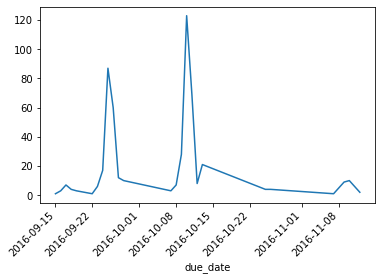

In [22]:
#####- LinePlots
eductn_cnt_by_date =loan_payment_data.groupby("due_date")["education"].count()
eductn_cnt_by_date.plot(x='due_date',y='education',kind='line',rot=45)
plt.show()

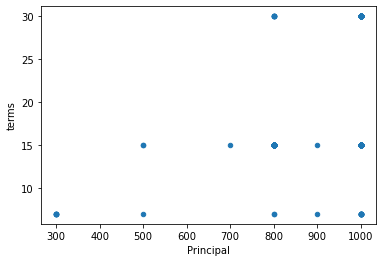

In [23]:
#Scatter Plots - 2 numeric variable - good for vizzing supply vs demand
loan_payment_data.plot(x='Principal',y='terms',kind='scatter')
plt.show()
####- higher principal amt needs more months for repayment.

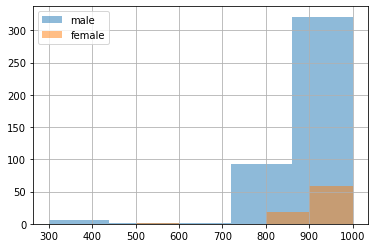

In [24]:
#Histogram - for comparison
loan_payment_data[loan_payment_data['Gender']=='male']['Principal'].hist(alpha=0.5,bins=5)
loan_payment_data[loan_payment_data['Gender']=='female']['Principal'].hist(alpha=0.5,bins=5)

plt.legend(["male","female"])
plt.show()

In [25]:
#MissingValues
loan_payment_data.isna().sum()       #.any()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
due_month           0
principal_sum       0
principal_max       0
year                0
dtype: int64

In [26]:
#Plotting Missing Values & removing them
loan_payment_data.isna().sum() #.plot(kind='bar')

#lpd_cmplt = loan_payment_data.dropna()
print(loan_payment_data.isna().any())

Loan_ID           False
loan_status       False
Principal         False
terms             False
effective_date    False
due_date          False
paid_off_time      True
past_due_days      True
age               False
education         False
Gender            False
due_month         False
principal_sum     False
principal_max     False
year              False
dtype: bool


array([[<AxesSubplot:title={'center':'past_due_days'}>]], dtype=object)

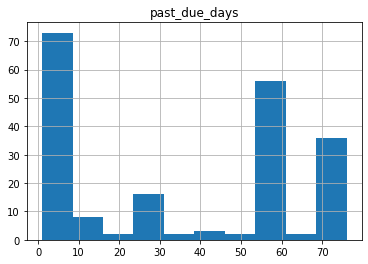

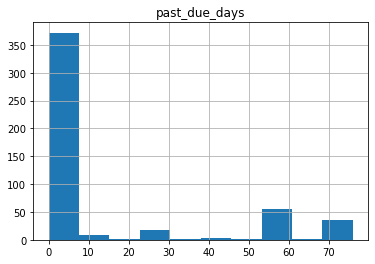

In [27]:
#Replacing Missing Values
# Fill in missing values with 0
cols_with_missing = ["past_due_days"]
lpd_filled = loan_payment_data.fillna(0)
loan_payment_data[cols_with_missing].hist()
# Create histograms of the filled columns
lpd_filled[cols_with_missing].hist()

In [28]:
#Create Dataframe
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [29]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

avocados_2019 = pd.DataFrame(avocados_dict)
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


In [30]:
#Reading & Writing to Files
#CSV to df > refer 1st step

#DF to csv

avocados_2019_sorted = avocados_2019.sort_values("small_sold",ascending=False)
print(avocados_2019_sorted)

avocados_2019_sorted.to_csv(input_path+"avocados_2019_sorted.csv")

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
